# Curve di possibilità pluviometrica - Monte Bondone (TN)

### Università degli Studi di Trento - Corso di Idrologia
### Autori:

- Giulia Omilli   209480
- Aya Essamih   209743
- Maria Eugenia Boccardi     209189


*Copyright: Creative Commons 4.0*

## Sommario

In questo Notebook calcoliamo le curve di possibilità pluvimetrica del Monte Bondone (TN) utilizzando i dati forniti dal servizio meteorologico della città. I dati sono disponibili all'indirizzo http://www.meteotrentino.it. 
La Stazione Monte Bondone contiene una serie di dati relativi all’arco temporale  1926-2002. 

In questo notebook in particolare si analizzano i massimi annuali **orari e pluriorari: 1h, 3h, 6h, 12h, 24h**. 
Per la determinazione dei tempi di ritorno si usa la curva di distribuzione di Gumbel:

$$ P[H<h; a,b] = e^{-e-{\frac{h-a}{b}}}$$

i cui parametri sono stati determinati usando i metodi dei momenti, dei minimi quadrati e della massima verosimiglianza. 

Il test di Pearson è stato usato per discriminare la migliore serie di parametri per ogni durata. 


## Caricamento delle librerie

Qui sono caricate le librerie necessarie ai calcoli

In [1]:
import os 
import math
from pandas import *
import pandas as pd
import datetime as datetime 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import genextreme,gumbel_r
from scipy.stats import norm
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.optimize import least_squares
from pylab import plot,show,hist,figure,title
import matplotlib.image as mpimg
import folium
from IPython.display import Image

In [2]:
os.getcwd()
os.chdir("/Users/user/Desktop/ES 1")

## Descrizione del sito e della stazione di misura

Sono caricate una tabella che contiene le informazioni rilevanti, una foto e una mappa che localizza la stazione di misura

In [3]:
stazione = pd.read_csv('Stazione Monte.csv')
stazione=stazione.set_index('Stazione meteorologica')
stazione

,Dettagli
Stazione meteorologica,
,T0144
Località,Monte Bondone
Coordinata Est,659010
Coordinata Nord,5097598
Longitudine,11°03’14.6” E
Latitudine,46°00’48.6” N
Comune,Trento
Provincia,Trento
Regione,Trentino-Alto Adige


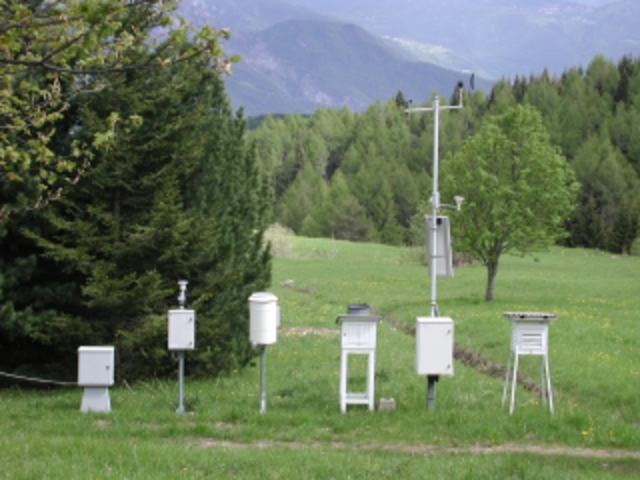

In [4]:
Image("Foto.jpg")

In [5]:
data = pd.DataFrame({
'lat':[46.0135],
'lon':[11.054056],
'name':['Stazione_meteorologica_Monte_Bondone']
})


m=folium.Map(width='100%',height='100%',location=[46.0135,11.054056], zoom_start=16)

for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']], popup=data.iloc[i]['name']).add_to(m)

m.save('Stazione_meteorologica_Monte_Bondone_map.html')
m

## Caricamento dei Dati

Sono caricati e visualizzati i dati della stazione

In [6]:
dati = pd.read_csv('monte bondone.txt')
map(datetime,dati['anno'])
dati=dati.set_index('anno')

In [7]:
dati

,1h,3h,6h,12h,24h
anno,,,,,
1926,20.0,35.8,52.0,57.2,60.0
1927,28.1,34.8,39.9,47.8,NaN
1932,21.8,33.4,39.8,54.8,69.2
1933,33.6,36.2,51.0,89.0,106.6
1934,16.0,27.2,42.4,70.2,98.6
1935,23.0,40.6,44.6,46.2,80.6
1936,21.0,25.2,26.4,42.6,48.8
1937,21.6,23.4,39.6,52.4,56.2
1938,20.6,27.0,41.2,51.0,89.0


## Visualizzazione dei dati

Text(0.5, 0, 'anno')

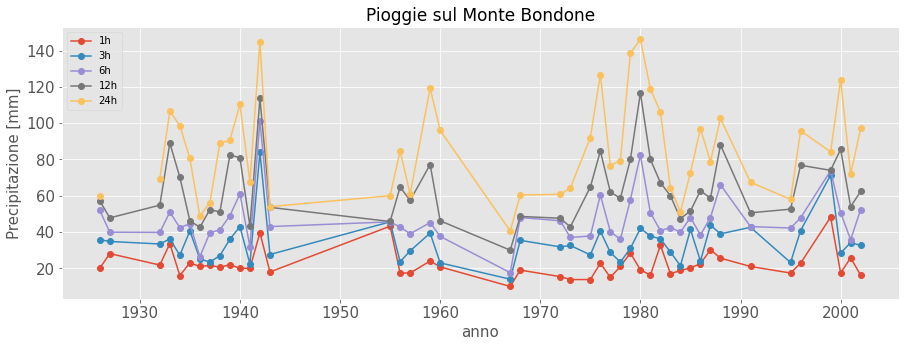

In [8]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.style.use("ggplot")
ax=dati.plot(style="o-",figsize=(15,5))
ax.set_title('Pioggie sul Monte Bondone',fontsize=17)
ax.set_ylabel("Precipitazione [mm]",fontsize=15)
ax.set_xlabel("anno", fontsize=15)

### Calcolo della media delle precipitazioni

In [9]:
media=dati.mean()

Text(0, 0.5, 'altezza di precipitazione (mm)')

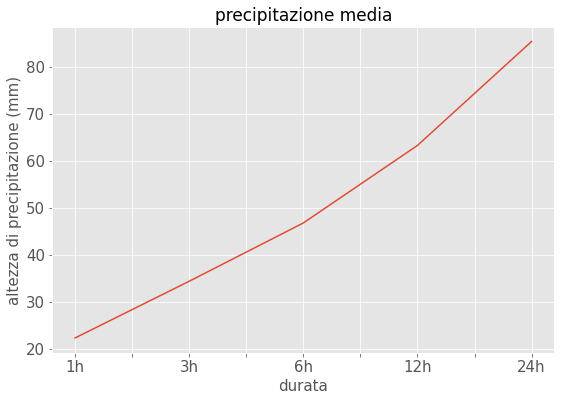

In [10]:
m=media.plot(color="#E24A33",figsize=(9,6))
m.grid(True)
m.set_title('precipitazione media',fontsize=17)
m.set_xlabel('durata',fontsize=15)
m.set_ylabel('altezza di precipitazione (mm)',fontsize=15)

### Calcolo della varianza

In [11]:
varianza=dati.var()

Text(0.5, 0, 'durata')

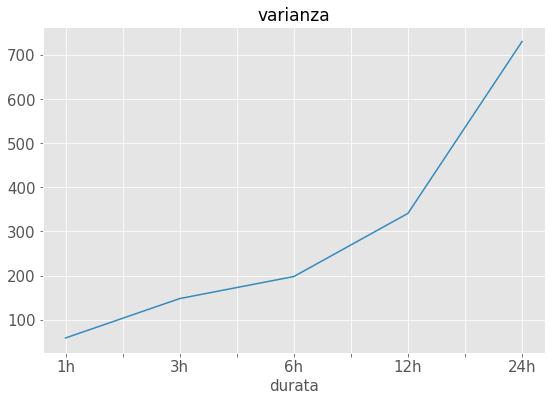

In [12]:
v=varianza.plot(color="#348ABD",figsize=(9,6))
v.grid(True)
v.set_title('varianza',fontsize=17)
v.set_xlabel('durata',fontsize=15)

### Calcolo della deviazione standard

In [13]:
std=dati.std()
devstd=std/media

Text(0.5, 0, 'durata')

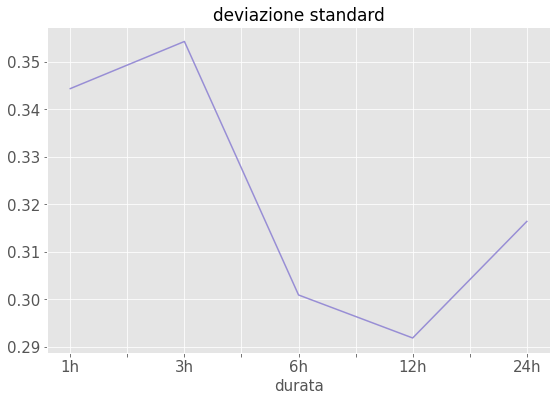

In [14]:
ds=devstd.plot(color="#988ED5",figsize=(9,6))
ds.grid(True)
ds.set_title('deviazione standard',fontsize=17)
ds.set_xlabel('durata',fontsize=15)

## Interpolazione delle curve di Gumbel

## Metodo dei momenti

Il metodo dei momenti consiste nel eguagliare media e varianza del campione con media e varianza della popolazione


\begin{equation}
\left\{
\begin{array}{l}
b \gamma + a = \mu_H \\
\sigma^2_H = b^2  \frac{\pi^2}{6}
\end{array}
\right.
\end{equation}
con $a$ e $b$ parametri da stimare, $\mu_H$ media dei campioni di dati e $\sigma_H$ deviazione standard 

Si ricava:
\begin{equation}
b = \frac{\sqrt{6}}{\pi} \sigma_H
\end{equation}

\begin{equation}
a = \mu_H -\frac{\sqrt{6}\gamma}{\pi} \sigma_H 
\end{equation}

In [15]:
gamma=0.577215664901532860606512090
j=math.sqrt(6)/math.pi
b=gamma*j

In [16]:
def f(m,s):
    return pd.DataFrame([m-b*s,j*s],index=["a","b"])

In [17]:
ab_momenti=f(media,std)
ab_momenti

,1h,3h,6h,12h,24h
a,18.796104,28.854201,40.413040,54.953885,73.255731
b,5.971906,9.481849,10.966685,14.396269,21.071629


In [18]:
ab_momenti.to_pickle("ab_momenti")

In [19]:
def gumbel(x,ab,col):
    return np.exp(-np.exp(-(x-ab[col]["a"])/ab[col]["b"]))

In [20]:
dati.min()[0]

10.0

In [21]:
dati.max()[4]

146.2

In [22]:
tpioggia=np.linspace(dati.min()[0]-3,dati.max()[4]+3,100)

In [23]:
def metodo(data,train,ab_i):
    c=[]
    for i in data.columns:
        c.append(gumbel(train,ab_i,i))
    g_i=pd.DataFrame(c).T
    g_i.index=train
    g_i.columns=["1h","3h","6h","12h","24h"]
    return g_i

g_mm=metodo(dati,tpioggia,ab_momenti)
g_mm

,1h,3h,6h,12h,24h
7.000000,0.000740,0.000044,7.231571e-10,7.152633e-13,8.371043e-11
8.436364,0.003457,0.000182,9.579823e-09,1.018064e-11,3.861995e-10
9.872727,0.011610,0.000609,9.241230e-08,1.126079e-10,1.610972e-09
11.309091,0.030098,0.001725,6.749321e-07,9.913944e-10,6.116337e-09
12.745455,0.063650,0.004220,3.861740e-06,7.099373e-09,2.126745e-08
...,...,...,...,...,...
143.454545,1.000000,0.999994,9.999169e-01,9.978634e-01,9.648895e-01
144.890909,1.000000,0.999995,9.999271e-01,9.980661e-01,9.671647e-01
146.327273,1.000000,0.999996,9.999361e-01,9.982496e-01,9.692948e-01
147.763636,1.000000,0.999996,9.999439e-01,9.984157e-01,9.712887e-01


<AxesSubplot:xlabel='pioggia (mm)', ylabel='P[H<h]'>

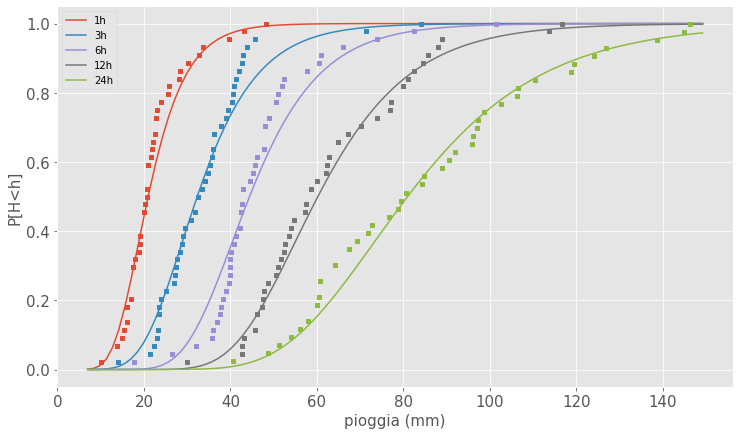

In [24]:
def grafico(data,gb,colours):
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    plt.style.use("ggplot")
    plt.rcParams["figure.figsize"]=(15,7)
    ax=gb.plot(color=colours)
    i=0
    for j in data.columns:
        d=data[j].dropna()
        ecdf_i=ECDF(d)
        ax.plot(d,ecdf_i(d),'s',c=colours[i],markersize=3.5)
        i+=1
    ax.set_xlabel('pioggia (mm)', fontsize=15)
    ax.set_ylabel('P[H<h]', fontsize=15)
    ax.grid(True)
    ax.set_aspect(80)
    return ax

#colori=["blue","green","orange","red","black"]
#colori=["#E24A33","#348ABD","#988ED5","#777777","#FBC15E"]
colori=["#E24A33","#348ABD","#988ED5","#777777","#8EBA42"]
#colori = plt.rcParams['axes.prop_cycle'].by_key()['color']
grafico(dati,g_mm,colori)

## Metodo della massima verosimiglianza

Il metodo della massima verosimiglianza calcola i valori dei parametri per cui  la probabilità congiunta di ottenere una serie di dati $\{h_1, \cdot \cdot, h_n \}$ è massima:
\begin{equation}
{\rm argmax}_{a,b} P[\{h_1, \cdot \cdot, h_n \};a,b] = {\rm argmax}_{a,b} \prod_i^n P[h_i;a,b]
\end{equation}

In [25]:
def veroS(data):
    p=[]
    for j in data.columns:
        samp=data[j].dropna()
        param=gumbel_r.fit(samp)
        p.append(param)
    return p

ab_maxver=pd.DataFrame(veroS(dati),
                     columns=["a","b"],
                     index=["1h","3h","6h","12h","24h"]).T
ab_maxver

,1h,3h,6h,12h,24h
a,19.068448,29.378395,40.797082,55.011156,72.866423
b,5.238433,8.492647,11.044055,14.191767,21.648129


In [26]:
ab_maxver.to_pickle("ab_maxver")

In [27]:
g_mv=metodo(dati,tpioggia,ab_maxver)
g_mv

,1h,3h,6h,12h,24h
7.000000,0.000045,8.796386e-07,5.440689e-10,1.605995e-13,7.895954e-10
8.436364,0.000495,7.701533e-06,7.336498e-09,2.737096e-12,3.032253e-09
9.872727,0.003070,4.810956e-05,7.203349e-08,3.550506e-11,1.068100e-08
11.309091,0.012297,2.259857e-04,5.352973e-07,3.598781e-10,3.470185e-08
12.745455,0.035311,8.344300e-04,3.114765e-06,2.918760e-09,1.045300e-07
...,...,...,...,...,...
143.454545,1.000000,9.999985e-01,9.999081e-01,9.980365e-01,9.623651e-01
144.890909,1.000000,9.999988e-01,9.999193e-01,9.982253e-01,9.647380e-01
146.327273,1.000000,9.999990e-01,9.999292e-01,9.983960e-01,9.669639e-01
147.763636,1.000000,9.999991e-01,9.999378e-01,9.985503e-01,9.690515e-01


<AxesSubplot:xlabel='pioggia (mm)', ylabel='P[H<h]'>

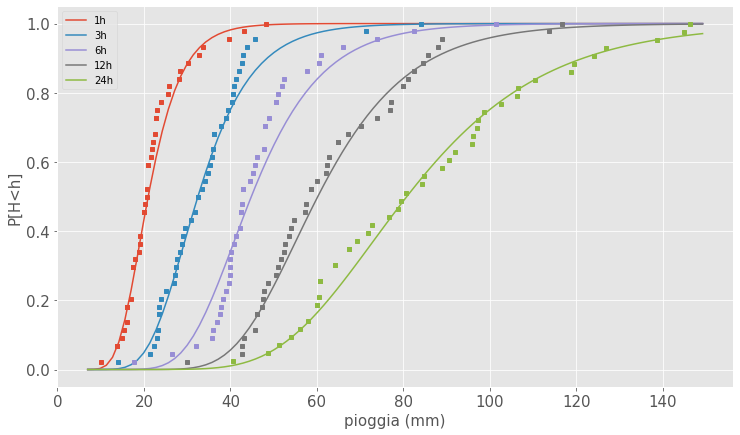

In [28]:
grafico(dati,g_mv,colori)

## Metodo dei minimi quadrati

Il metodo dei minimi quadrati consiste nel minimizzare lo scarto quadratico tra il valore empirico e quello della probabilità:
\begin{equation} 
\delta^2(a,b) = \sum_i^N (ECDF_i-P[h_i;a,b])^2 \to \rm min 
\end{equation}

In [29]:
def fun(x,t,y):
    return np.exp(-np.exp(-(t-x[0])/x[1]))-y

In [30]:
def quadrato(data,x_i):
    z=[]
    j=0
    for i in data.columns:
        ecdf_i=ECDF(data[i].dropna())
        t_tpioggia=sorted(data[i].dropna())
        y_tpioggia=ecdf_i(t_tpioggia)
        res_lsq_i = least_squares(fun, x_i[j], args=(t_tpioggia, y_tpioggia))
        z.append(res_lsq_i.x)
        j=j+1
    return z

In [31]:
x=[[19.,5.],[29.,9.],[40.,11.],[55.,14.],[73.,21.]]
ab_mq=pd.DataFrame(quadrato(dati,x),columns=["a","b"],
                     index=["1h","3h","6h","12h","24h"]).T
ab_mq

,1h,3h,6h,12h,24h
a,18.604122,29.112980,41.145851,53.828238,71.146801
b,4.378748,7.908677,6.839530,14.079839,24.144636


In [32]:
ab_mq.to_pickle("ab_mq")

In [33]:
g_mq=metodo(dati,tpioggia,ab_mq)
g_mq

,1h,3h,6h,12h,24h
7.000000,7.118074e-07,7.698470e-08,1.074729e-64,8.243124e-13,6.474530e-07
8.436364,3.729108e-05,1.169057e-06,1.407509e-52,1.224741e-11,1.474491e-06
9.872727,6.457222e-04,1.129936e-05,9.339728e-43,1.400669e-10,3.202080e-06
11.309091,5.036691e-03,7.492839e-05,8.545262e-35,1.264704e-09,6.649224e-06
12.745455,2.211878e-02,3.629010e-04,2.426861e-28,9.224833e-09,1.323677e-05
...,...,...,...,...,...
143.454545,1.000000e+00,9.999995e-01,9.999997e-01,9.982817e-01,9.511839e-01
144.890909,1.000000e+00,9.999996e-01,9.999997e-01,9.984482e-01,9.539372e-01
146.327273,1.000000e+00,9.999996e-01,9.999998e-01,9.985986e-01,9.565389e-01
147.763636,1.000000e+00,9.999997e-01,9.999998e-01,9.987345e-01,9.589968e-01


<AxesSubplot:xlabel='pioggia (mm)', ylabel='P[H<h]'>

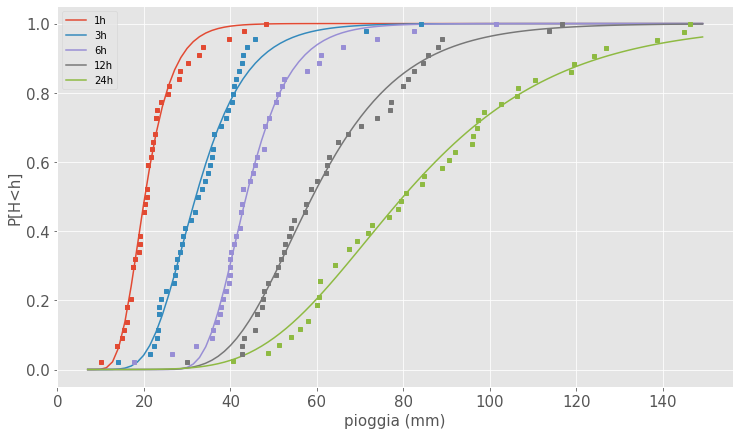

In [34]:
grafico(dati,g_mq,colori)

## Test di Pearson

La formula dell'$X^2$ è:
\begin{equation}
X^2 = \frac{1}{e}\sum_{i=1}^k (e - o)^2
\end{equation}

In [35]:
ab_momenti=pd.read_pickle("ab_momenti")
ab_maxver=pd.read_pickle("ab_maxver")
ab_mq=pd.read_pickle("ab_mq")

In [36]:
def X2(dati,ab_t,h,delta):    
    dt=dati[h].dropna()
    lh=len(dt)
    q=[delta*(i+1) for i in range(int(1/delta))]
    rv=gumbel_r(loc=ab_t.at["a",h],scale=ab_t.at["b",h])
    ecdf = ECDF(dt)
    r=ecdf(rv.ppf(q))
    o0=lh*r
    o=o0-np.append([0],np.delete(o0,-1))
    e=[delta*lh for i in range(len(r))]
    return ((o-e)**2/e).sum()  

In [37]:
for  h in dati.columns:
    print(h,": ",[X2(dati,ab_momenti,h,0.2),X2(dati,ab_mq,h,0.2),X2(dati,ab_maxver,h,0.2)])

1h :  [9.863636363636362, 1.2272727272727286, 1.6818181818181814]
3h :  [7.363636363636369, 2.3636363636363633, 3.5000000000000044]
6h :  [7.590909090909089, 0.09090909090909093, 11.227272727272725]
12h :  [3.045454545454545, 4.409090909090908, 3.045454545454545]
24h :  [1.9999999999999998, 3.6279069767441863, 1.9999999999999998]


In [38]:
a=[]
for  h in dati.columns:
    a=a+[[X2(dati,ab_momenti,h,0.2),X2(dati,ab_mq,h,0.2),X2(dati,ab_maxver,h,0.2)]]
   
pd.DataFrame(a,index=["1h","3h","6h","12h","24h"],columns=["mm","mq","maxver"])

,mm,mq,maxver
1h,9.863636,1.227273,1.681818
3h,7.363636,2.363636,3.500000
6h,7.590909,0.090909,11.227273
12h,3.045455,4.409091,3.045455
24h,2.000000,3.627907,2.000000


In [39]:
z=[]
k=0
for i in a:
    minimo=min(i)
    pos=i.index(minimo)
    if pos==0:
        z.append(ab_momenti[dati.columns[k]])
    elif pos==1:
        z.append(ab_mq[dati.columns[k]])
    else:
        z.append(ab_maxver[dati.columns[k]])
    k+=1
best=DataFrame(z).T                
best

,1h,3h,6h,12h,24h
a,18.604122,29.112980,41.145851,54.953885,73.255731
b,4.378748,7.908677,6.839530,14.396269,21.071629


In [40]:
best.to_pickle("best_param")

In [41]:
g_best=metodo(dati,tpioggia,best)
g_best

,1h,3h,6h,12h,24h
7.000000,7.118074e-07,7.698470e-08,1.074729e-64,7.152633e-13,8.371043e-11
8.436364,3.729108e-05,1.169057e-06,1.407509e-52,1.018064e-11,3.861995e-10
9.872727,6.457222e-04,1.129936e-05,9.339728e-43,1.126079e-10,1.610972e-09
11.309091,5.036691e-03,7.492839e-05,8.545262e-35,9.913944e-10,6.116337e-09
12.745455,2.211878e-02,3.629010e-04,2.426861e-28,7.099373e-09,2.126745e-08
...,...,...,...,...,...
143.454545,1.000000e+00,9.999995e-01,9.999997e-01,9.978634e-01,9.648895e-01
144.890909,1.000000e+00,9.999996e-01,9.999997e-01,9.980661e-01,9.671647e-01
146.327273,1.000000e+00,9.999996e-01,9.999998e-01,9.982496e-01,9.692948e-01
147.763636,1.000000e+00,9.999997e-01,9.999998e-01,9.984157e-01,9.712887e-01


<AxesSubplot:xlabel='pioggia (mm)', ylabel='P[H<h]'>

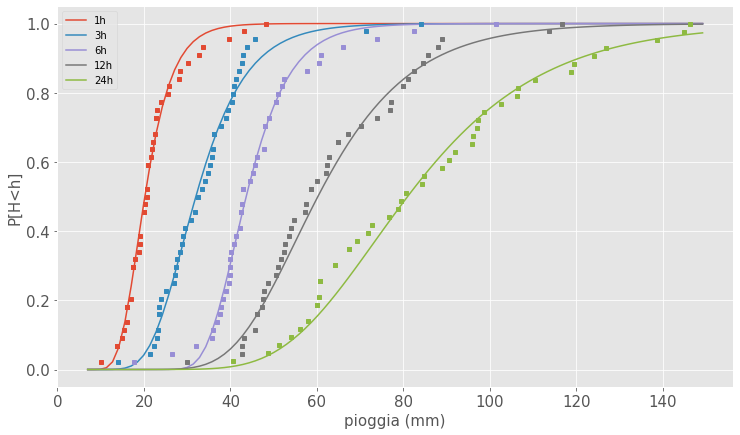

In [42]:
grafico(dati,g_best,colori)

## Visualizzazione delle curve di possibilità pluviometrica

Le curve di possibilità pluviometrica hanno la seguente equazione:

\begin{array}{l}
h(t_p,Tr)=a(Tr)t_p^n
\end{array}

$h(t_p,Tr)$ = altezza di precipitazione [mm]

$t_p$= durata dell'evento [ore]

$a(Tr)$=coefficiente dipendente dal tempo di ritorno [mm /ore]

$n$ =esponente adimensionale, che non dipende dal tempo di ritorno


Tramite la linea segnalatrice di possibilità pluviometrica per una determinata durata della pioggia $tp$, è possibile calcolare il massimo valore di $h$ per un prefissato tempo di ritorno $Tr$.

In [43]:
best=pd.read_pickle("best_param")
best

,1h,3h,6h,12h,24h
a,18.604122,29.112980,41.145851,54.953885,73.255731
b,4.378748,7.908677,6.839530,14.396269,21.071629


In [44]:
def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

In [45]:
def h_g(bs,col,tr):
    return bs[col]["a"]+bs[col]["b"]*(-math.log(-math.log(1-1/tr)))

In [46]:
tr=[10,20,100]
t=[]
for k in tr:
    q_k=1-1/k
    r=[]
    for j in dati.columns:
        r.append(qtls(best[j],q_k))
    t.append(r)
pts=DataFrame(t,index=tr,columns=[1,3,6,12,24]).T
pts

,10,20,100
1,28.457915,31.609860,38.747018
3,46.910408,52.603295,65.494074
6,56.537306,61.460591,72.608710
12,87.350777,97.713614,121.178869
24,120.674635,135.842581,170.188366


(10.0, 200.0)

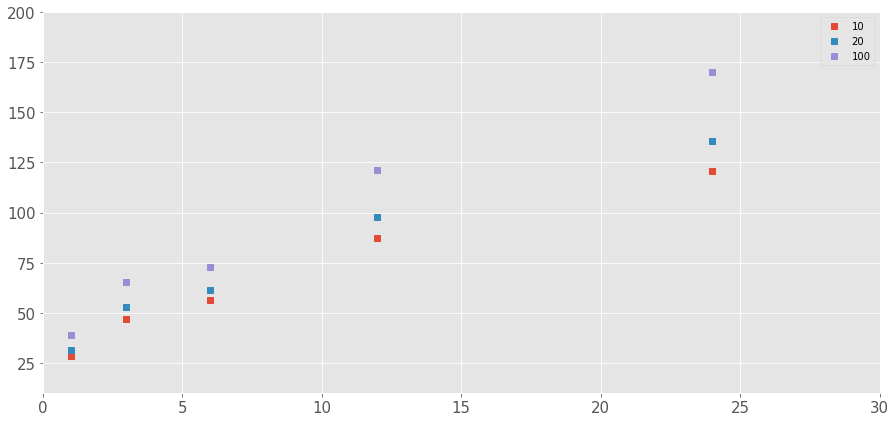

In [47]:
pts.plot(style="s")
plt.xlim([0,30])
plt.ylim([10,200])

(20, 300)

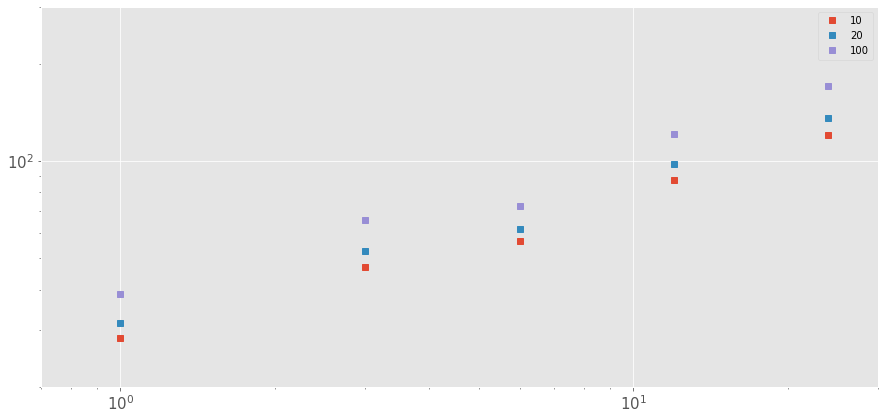

In [48]:
ag=pts.plot(style="s")
ag.set_yscale('log')
ag.set_xscale('log')
plt.xlim([0.7,30])
plt.ylim([20,300])

In [49]:
f=[1,2,3,4]
g=[1,2,3,4]
np.polyfit(f,g,1)

array([1.00000000e+00, 8.25508711e-16])

In [50]:
y=[]
for k in tr:
    in_i=np.polyfit(np.log(pts[k].index),np.log(pts[k]),1)
    in_i[1]=np.exp(in_i[1])
    y.append(in_i)

In [51]:
fnl=pd.DataFrame(y,index=tr,columns=["n","a"])
fnl

,n,a
10,0.451791,27.828347
20,0.454681,30.809702
100,0.459383,37.554850


In [52]:
tp=np.linspace(0.7,30,100)

In [53]:
def h(tp,a,n):
    return a*tp**n

In [54]:
e=[]
for k in tr:
    h_i=h(tp,fnl["a"][k],fnl["n"][k])
    e.append(h_i)

In [55]:
inh=pd.DataFrame(e,index=["Tr = 10","Tr = 20","Tr = 100"],
              columns=tp).T
inh

,Tr = 10,Tr = 20,Tr = 100
0.700000,23.686673,26.197304,31.879143
0.995960,27.777493,30.753039,37.485069
1.291919,31.242269,34.614977,42.244066
1.587879,34.293746,38.018522,46.442779
1.883838,37.046716,41.090789,50.236171
...,...,...,...
28.816162,127.039339,142.021990,175.872814
29.112121,127.627173,142.683363,176.700316
29.408081,128.211739,143.341080,177.523283
29.704040,128.793090,143.995197,178.341785


(10.0, 200.0)

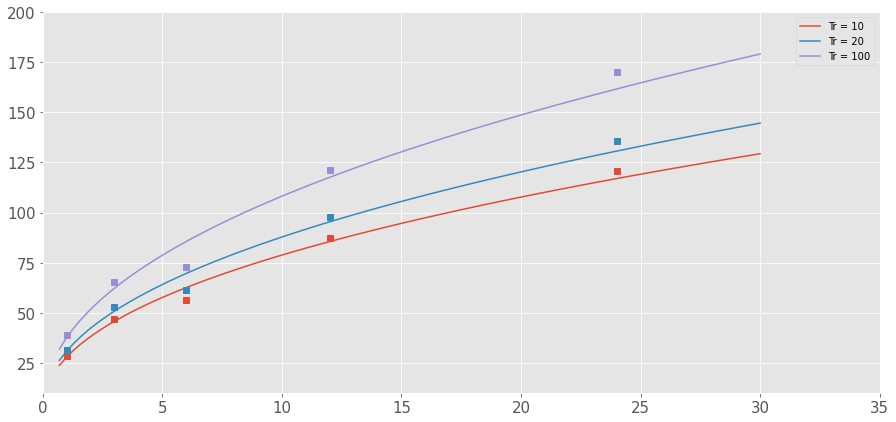

In [56]:
ag=inh.plot()
ag=plot(pts[10],"s",color="#E24A33")
ag=plot(pts[20],"s",color="#348ABD")
ag=plot(pts[100],"s",color="#988ED5")
plt.xlim([0,35])
plt.ylim([10,200])

(10, 300)

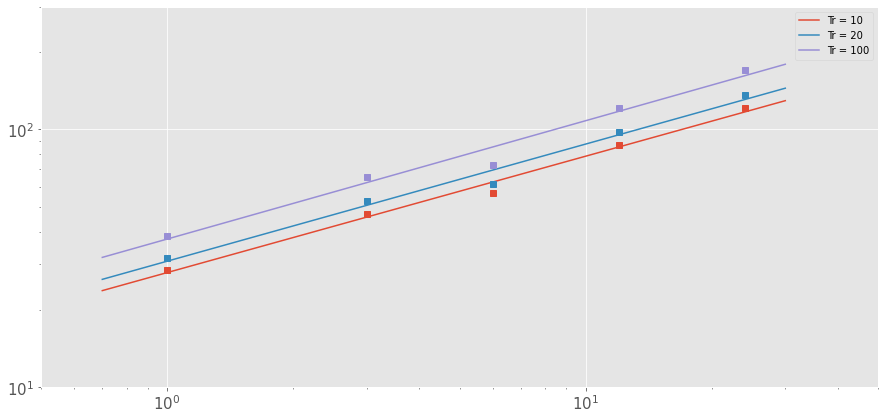

In [57]:
ag=inh.plot()
ag.set_yscale('log')
ag.set_xscale('log')
ag=plot(pts[10],"s",color="#E24A33")
ag=plot(pts[20],"s",color="#348ABD")
ag=plot(pts[100],"s",color="#988ED5")
plt.xlim([0.5,50])
plt.ylim([10,300])

## Commenti
Come si può notare dai grafici, i punti riferiti alla durata di 6h presentano un andamento che si discosta dagli altri: i punti di colore viola e blu arrivano a toccare le altre rette. Questo potrebbe essere dovuto al fatto che i valori di a e b scelti per questa durata non erano i migliori: infatti, come si può notare dalla tabella, il valore del metodo dei minimi quadrati per la durata di 6h è molto minore rispetto agli altri.